In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Airbnbprediction.csv")
data

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [3]:
col_to_del = [
    'id', 'description', 'first_review', 'host_has_profile_pic', 
    'host_identity_verified', 'host_response_rate', 'host_since', 
    'last_review', 'latitude', 'longitude', 'name', 
    'number_of_reviews', 'review_scores_rating', 'thumbnail_url', 
    'zipcode'
]
data = data.drop(columns=col_to_del)
data


,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,Brooklyn Heights,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,Hell's Kitchen,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,Harlem,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,f,Lower Haight,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,Columbia Heights,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,f,Williamsburg,1.0,1.0
74107,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,f,Hermosa Beach,2.0,4.0
74108,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,t,Williamsburg,2.0,2.0
74109,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,t,West Village,0.0,2.0


In [4]:
data['log_price'] = np.exp(data['log_price'])
data

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,bedrooms,beds
0,150.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,Brooklyn Heights,1.0,1.0
1,169.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,Hell's Kitchen,3.0,3.0
2,145.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,Harlem,1.0,3.0
3,750.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,f,Lower Haight,2.0,2.0
4,115.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,Columbia Heights,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,100.0,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,f,Williamsburg,1.0,1.0
74107,155.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,f,Hermosa Beach,2.0,4.0
74108,185.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,t,Williamsburg,2.0,2.0
74109,195.0,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,t,West Village,0.0,2.0


In [5]:
amenities_null = data[data['amenities'] == "{}"]
data = data.drop(amenities_null.index)
data

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,bedrooms,beds
0,150.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,Brooklyn Heights,1.0,1.0
1,169.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,Hell's Kitchen,3.0,3.0
2,145.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,Harlem,1.0,3.0
3,750.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,f,Lower Haight,2.0,2.0
4,115.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,Columbia Heights,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74105,70.0,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,LA,f,NaN,1.0,1.0
74107,155.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,f,Hermosa Beach,2.0,4.0
74108,185.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,t,Williamsburg,2.0,2.0
74109,195.0,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,t,West Village,0.0,2.0


In [25]:
data.duplicated().sum()

232

In [7]:
data = data[(data['log_price'] >= 20) & (data['log_price'] <= 1000)]
data.shape[0]

72715

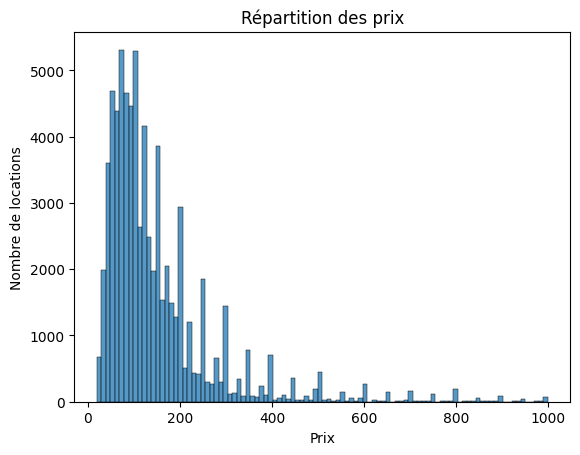

In [8]:
sns.histplot(data['log_price'], bins=100) 
plt.title('Répartition des prix')
plt.xlabel('Prix')
plt.ylabel('Nombre de locations')
plt.show()

In [26]:
data['property_type'].value_counts()

property_type
Apartment             47721
House                 15181
Condominium            2495
Townhouse              1595
Loft                   1160
Other                   548
Guesthouse              495
Bed & Breakfast         444
Bungalow                363
Villa                   133
Dorm                    129
Guest suite             122
Timeshare                91
Camper/RV                89
In-law                   71
Cabin                    71
Boutique hotel           65
Boat                     57
Hostel                   48
Serviced apartment       20
Name: count, dtype: int64

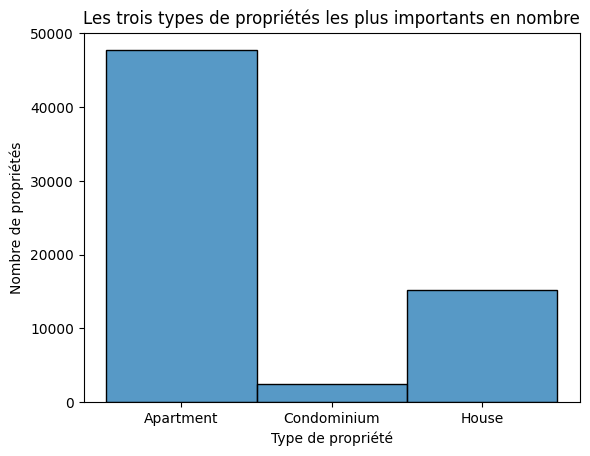

In [9]:
data = data[data['log_price'] < 500]
top_3_types = data['property_type'].value_counts().head(3).index
data_top_3 = data[data['property_type'].isin(top_3_types)]

sns.histplot(data=data_top_3, x='property_type')
plt.title('Les trois types de propriétés les plus importants en nombre')
plt.xlabel('Type de propriété')
plt.ylabel('Nombre de propriétés')
plt.show()

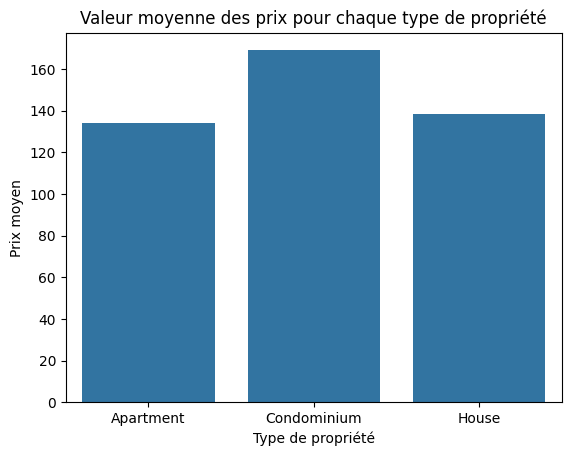

In [10]:
moy = data_top_3.groupby('property_type')['log_price'].mean()
sns.barplot(x=moy.index, y=moy.values)
plt.title('Valeur moyenne des prix pour chaque type de propriété')
plt.xlabel('Type de propriété')
plt.ylabel('Prix moyen')
plt.show()

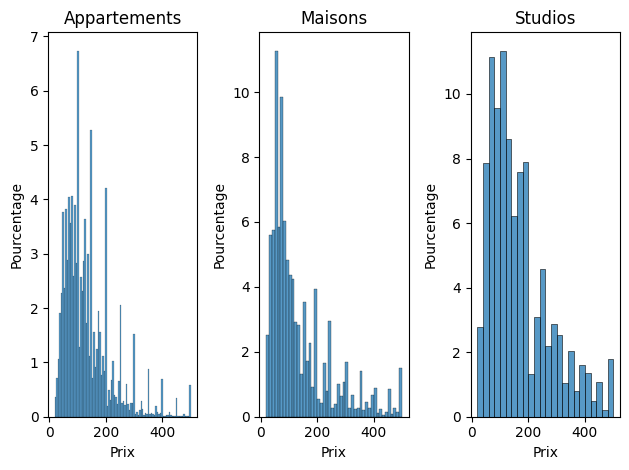

In [11]:
df_appartement = data_top_3[data_top_3['property_type'] == 'Apartment']
df_maison = data_top_3[data_top_3['property_type'] == 'House']
df_studio = data_top_3[data_top_3['property_type'] == 'Condominium']

plt.subplot(1, 3, 1)
sns.histplot(data=df_appartement, x='log_price', stat='percent')
plt.title('Appartements')
plt.xlabel('Prix')
plt.ylabel('Pourcentage')

plt.subplot(1, 3, 2)
sns.histplot(data=df_maison, x='log_price', stat='percent')
plt.title('Maisons')
plt.xlabel('Prix')
plt.ylabel('Pourcentage')

plt.subplot(1, 3, 3)
sns.histplot(data=df_studio, x='log_price', stat='percent')
plt.title('Studios')
plt.xlabel('Prix')
plt.ylabel('Pourcentage')

plt.tight_layout()
plt.show()

# EX2

In [12]:
# Sélectionne les colonnes de type 'object' dans le DataFrame
object_features = data.select_dtypes(include='object').columns.tolist()

# Pour chaque colonne, compte et affiche le nombre de valeurs
for feature in object_features:
    unique_values = data[feature].nunique()
    print(f"{feature} a {unique_values} valeurs différentes.")

property_type a 34 valeurs différentes.
room_type a 3 valeurs différentes.
amenities a 64853 valeurs différentes.
bed_type a 5 valeurs différentes.
cancellation_policy a 5 valeurs différentes.
city a 6 valeurs différentes.
instant_bookable a 2 valeurs différentes.
neighbourhood a 616 valeurs différentes.


In [13]:
df_t = data[data['instant_bookable'] == 't']
df_f = data[data['instant_bookable'] == 'f']

count_t = len(df_t)
count_f = len(df_f)

mean_price_t = df_t['log_price'].mean()
mean_price_f = df_f['log_price'].mean()

print(f"Nombre de samples avec 't': {count_t}")
print(f"Prix moyen avec 't': {mean_price_t}")

print(f"Nombre de samples avec 'f': {count_f}")
print(f"Prix moyen avec 'f': {mean_price_f}")

Nombre de samples avec 't': 18702
Prix moyen avec 't': 131.60742166613196
Nombre de samples avec 'f': 52248
Prix moyen avec 'f': 138.46665901087124


In [14]:
missing_data = data.isna().sum()

print("Données manquantes dans chaque colonne :")
print(missing_data)

Données manquantes dans chaque colonne :
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms               160
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
instant_bookable          0
neighbourhood          6406
bedrooms                 88
beds                    102
dtype: int64


In [15]:
data_grouped = data.groupby('instant_bookable')
data_f = data_grouped.get_group('f')
data_f

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,bedrooms,beds
0,150.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,Brooklyn Heights,1.0,1.0
7,120.0,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,f,Downtown,1.0,1.0
8,120.0,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,f,Richmond District,1.0,1.0
10,100.0,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,NYC,f,Alphabet City,1.0,1.0
11,150.0,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.5,Real Bed,strict,True,LA,f,Hermosa Beach,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74103,170.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,SF,f,Union Square,1.0,1.0
74104,78.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,Chicago,f,NaN,1.0,1.0
74105,70.0,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,LA,f,NaN,1.0,1.0
74107,155.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,f,Hermosa Beach,2.0,4.0


In [16]:
data_t = data_grouped.get_group('t')
data_t


,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,bedrooms,beds
1,169.0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,Hell's Kitchen,3.0,3.0
2,145.0,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,Harlem,1.0,3.0
4,115.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,Columbia Heights,0.0,1.0
5,85.0,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,t,Noe Valley,1.0,1.0
6,83.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,Real Bed,moderate,True,LA,t,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74092,110.0,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,2.0,Real Bed,strict,True,Chicago,t,Old Town,2.0,3.0
74097,110.0,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,NYC,t,Chelsea,1.0,1.0
74099,72.0,Condominium,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,LA,t,NaN,1.0,1.0
74108,185.0,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,t,Williamsburg,2.0,2.0


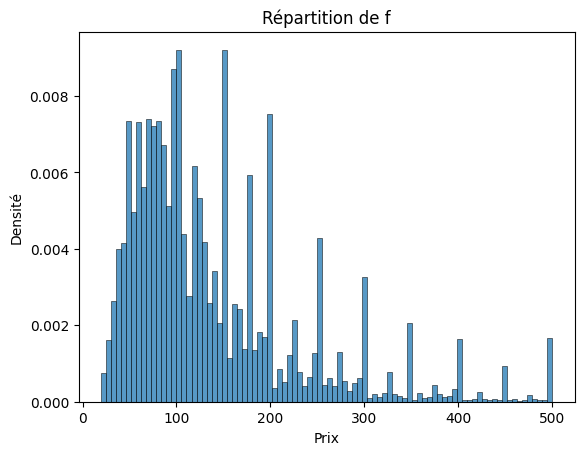

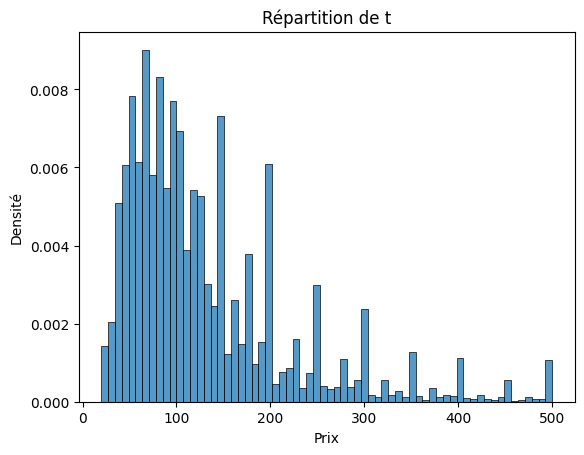

In [17]:
sns.histplot(data_f['log_price'], kde=False, stat="density")

plt.title("Répartition de f")
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.show()

sns.histplot(data_t['log_price'], kde=False, stat="density")

plt.title("Répartition de t")
plt.xlabel("Prix")
plt.ylabel("Densité")
plt.show()

Non, la répartition est équivalente

# EX 3

In [18]:
room_type_stats = data.groupby('room_type')['log_price'].agg(['count', 'mean'])

room_type_stats


,count,mean
room_type,,
Entire home/apt,38863,181.231660
Private room,30105,84.187975
Shared room,1982,59.658426


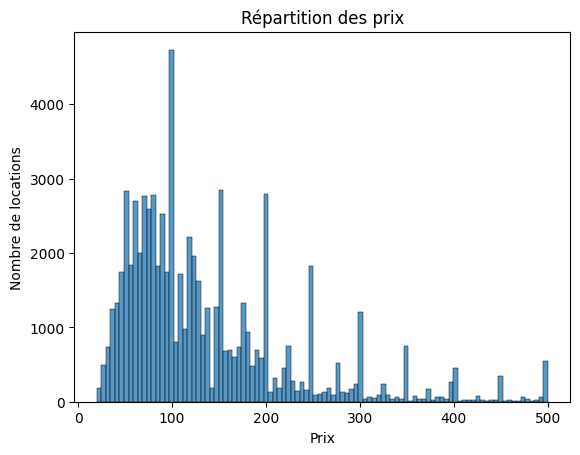

In [19]:
sns.histplot(data['log_price'], bins=100)
plt.title('Répartition des prix')
plt.xlabel('Prix')
plt.ylabel('Nombre de locations')
plt.show()

In [20]:
data['room_type'] = data['room_type'].astype('category')
data['room_type'] = data['room_type'].cat.codes
data

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,bedrooms,beds
0,150.0,Apartment,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,Brooklyn Heights,1.0,1.0
1,169.0,Apartment,0,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,Hell's Kitchen,3.0,3.0
2,145.0,Apartment,0,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,Harlem,1.0,3.0
4,115.0,Apartment,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,Columbia Heights,0.0,1.0
5,85.0,Apartment,1,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,t,Noe Valley,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74105,70.0,House,1,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,LA,f,NaN,1.0,1.0
74107,155.0,Apartment,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,LA,f,Hermosa Beach,2.0,4.0
74108,185.0,Apartment,0,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,NYC,t,Williamsburg,2.0,2.0
74109,195.0,Apartment,0,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,NYC,t,West Village,0.0,2.0


# EX4

In [21]:
property_type_stats = data.groupby('property_type')['log_price'].agg(['count', 'mean'])
property_type_stats

,count,mean
property_type,,
Apartment,47721,134.015653
Bed & Breakfast,444,112.072072
Boat,57,183.736842
Boutique hotel,65,158.738462
Bungalow,363,130.672176
Cabin,71,116.971831
Camper/RV,89,128.494382
Casa particular,1,80.000000
Castle,12,216.166667


In [22]:

property_type_mean = data.groupby('property_type')['log_price'].mean()
high_price_property_types = property_type_mean[property_type_mean > 200].index.tolist()
data['property_type'] = data['property_type'].replace(high_price_property_types, 'Timeshare')
data['property_type'].value_counts()


property_type
Apartment             47721
House                 15181
Condominium            2495
Townhouse              1595
Loft                   1160
Other                   548
Guesthouse              495
Bed & Breakfast         444
Bungalow                363
Villa                   133
Dorm                    129
Guest suite             122
Timeshare                91
Camper/RV                89
In-law                   71
Cabin                    71
Boutique hotel           65
Boat                     57
Hostel                   48
Serviced apartment       20
Tent                     16
Yurt                      9
Hut                       7
Treehouse                 6
Chalet                    5
Earth House               3
Train                     2
Cave                      2
Casa particular           1
Island                    1
Name: count, dtype: int64

In [23]:
property_type_counts = data['property_type'].value_counts()
low_count_property_types = property_type_counts[property_type_counts < 20].index.tolist()
data = data[~data['property_type'].isin(low_count_property_types)]
data['property_type'].value_counts()

property_type
Apartment             47721
House                 15181
Condominium            2495
Townhouse              1595
Loft                   1160
Other                   548
Guesthouse              495
Bed & Breakfast         444
Bungalow                363
Villa                   133
Dorm                    129
Guest suite             122
Timeshare                91
Camper/RV                89
In-law                   71
Cabin                    71
Boutique hotel           65
Boat                     57
Hostel                   48
Serviced apartment       20
Name: count, dtype: int64